# 1.Problem Statement

Data Analytics: Download the dataset of taxi trips in New York https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips Write a notebook with descriptive queries in Spark, Pandas and visualize the results (matplotlib, bokeh, holoviews, seaborn). 
Bonus: Expose the result in a web dashboard using Dash (https://dash.plot.ly/) 

# 2. Python Libraries

In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 3. Datasets

## 3.1. Data Dictionary

In [2]:
# please remove file by your path file contain dataset
filename = 'nyc_taxi_data_2014.csv'
df = pd.read_csv(filename)
df.head(5)

C:\Users\viet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0       CMT  2014-01-09 20:45:25  2014-01-09 20:52:31                1   
1       CMT  2014-01-09 20:46:12  2014-01-09 20:55:12                1   
2       CMT  2014-01-09 20:44:47  2014-01-09 20:59:46                2   
3       CMT  2014-01-09 20:44:57  2014-01-09 20:51:40                1   
4       CMT  2014-01-09 20:47:09  2014-01-09 20:53:32                1   

   trip_distance  pickup_longitude  pickup_latitude  rate_code  \
0            0.7        -73.994770        40.736828          1   
1            1.4        -73.982392        40.773382          1   
2            2.3        -73.988570        40.739406          1   
3            1.7        -73.960213        40.770464          1   
4            0.9        -73.995371        40.717248          1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude payment_type  \
0                  N         -73.982227         40.731790          CRD   
1                  N         -73.960449         40.763995          CRD   
2                  N         -73.986626         40.765217          CRD   
3                  N         -73.979863         40.777050          CRD   
4                  N         -73.984367         40.720524          CRD   

   fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount  
0          6.5        0.5      0.5        1.40           0.0          8.90  
1          8.5        0.5      0.5        1.90           0.0         11.40  
2         11.5        0.5      0.5        1.50           0.0         14.00  
3          7.5        0.5      0.5        1.70           0.0         10.20  
4          6.0        0.5      0.5        1.75           0.0          8.75

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* payment_type - the kind of currenc
* fare_amount - the total fare
* surcharge - the money paid for surcharge
* mta_tax -
* tip_amount - the money paid for tip
* tolls_amount - the money paid for tolls
* total_amount - the money paid for all
* trip_distance - the distance of trip
* rate_code - the code of rateing
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip


## 3.2. Dataset Overview

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 18 columns):
vendor_id             object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             int64
store_and_fwd_flag    object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtypes: float64(11), int64(2), object(5)
memory usage: 2.0+ GB


In [4]:
print("Total number of samples in dataset: ", df.shape[0])
print("Number of columns in dataset: ", df.shape[1])

Total number of samples in dataset:  14999999
Number of columns in dataset:  18


In [5]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [55]:
df.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0       CMT 2014-01-09 20:45:25 2014-01-09 20:52:31                1   
1       CMT 2014-01-09 20:46:12 2014-01-09 20:55:12                1   
2       CMT 2014-01-09 20:44:47 2014-01-09 20:59:46                2   
3       CMT 2014-01-09 20:44:57 2014-01-09 20:51:40                1   
4       CMT 2014-01-09 20:47:09 2014-01-09 20:53:32                1   

   trip_distance  pickup_longitude  pickup_latitude  rate_code  \
0            0.7        -73.994770        40.736828          1   
1            1.4        -73.982392        40.773382          1   
2            2.3        -73.988570        40.739406          1   
3            1.7        -73.960213        40.770464          1   
4            0.9        -73.995371        40.717248          1   

  store_and_fwd_flag  dropoff_longitude  ...  surcharge mta_tax  tip_amount  \
0                  N         -73.982227  ...        0.5     0.5        1.40   
1                  N         -73.960449  ...        0.5     0.5        1.90   
2                  N         -73.986626  ...        0.5     0.5        1.50   
3                  N         -73.979863  ...        0.5     0.5        1.70   
4                  N         -73.984367  ...        0.5     0.5        1.75   

   tolls_amount  total_amount  pickup_dayofweek  pickup_weekday_name  \
0           0.0          8.90                 3             Thursday   
1           0.0         11.40                 3             Thursday   
2           0.0         14.00                 3             Thursday   
3           0.0         10.20                 3             Thursday   
4           0.0          8.75                 3             Thursday   

   pickup_hour  pickup_month trip_duration  
0           20             1         426.0  
1           20             1         540.0  
2           20             1         899.0  
3           20             1         403.0  
4           20             1         383.0  

[5 rows x 23 columns]

In [13]:
df.describe()

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
count     1.500000e+07   1.500000e+07      1.500000e+07     1.500000e+07   
mean      1.701826e+00   2.792074e+00     -7.296749e+01     4.019355e+01   
std       1.390736e+00   3.326122e+00      8.586309e+00     4.762641e+00   
min       0.000000e+00   0.000000e+00     -7.366000e+02    -1.800000e+02   
25%       1.000000e+00   1.000000e+00     -7.399198e+01     4.073535e+01   
50%       1.000000e+00   1.700000e+00     -7.398183e+01     4.075298e+01   
75%       2.000000e+00   3.080000e+00     -7.396735e+01     4.076724e+01   
max       2.080000e+02   1.000000e+02      8.054390e+01     7.328431e+01   

          rate_code  dropoff_longitude  dropoff_latitude   fare_amount  \
count  1.500000e+07       1.499985e+07      1.499985e+07  1.500000e+07   
mean   1.033778e+00      -7.290756e+01      4.016132e+01  1.201335e+01   
std    7.177268e-01       8.843060e+00      4.897983e+00  1.006726e+01   
min    0.000000e+00      -7.754167e+02     -1.800000e+02  2.500000e+00   
25%    1.000000e+00      -7.399135e+01      4.073420e+01  6.500000e+00   
50%    1.000000e+00      -7.398007e+01      4.075337e+01  9.000000e+00   
75%    1.000000e+00      -7.396351e+01      4.076839e+01  1.350000e+01   
max    2.100000e+02       1.193360e+02      4.040833e+02  5.000000e+02   

          surcharge       mta_tax    tip_amount  tolls_amount  total_amount  
count  1.500000e+07  1.500000e+07  1.500000e+07  1.500000e+07  1.500000e+07  
mean   3.145898e-01  4.982227e-01  1.455907e+00  2.404203e-01  1.452348e+01  
std    3.633407e-01  2.975721e-02  2.244646e+00  1.191025e+00  1.216687e+01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.500000e+00  
25%    0.000000e+00  5.000000e-01  0.000000e+00  0.000000e+00  8.000000e+00  
50%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00  1.100000e+01  
75%    5.000000e-01  5.000000e-01  2.000000e+00  0.000000e+00  1.610000e+01  
max    1.340000e+01  5.000000e-01  2.000000e+02  2.000000e+01  7.000000e+02

# 4. Missing Values

In [4]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
rate_code                   0
store_and_fwd_flag    7636077
dropoff_longitude         145
dropoff_latitude          145
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
dtype: int64

## 5. Explore Datas

### The number of observations in the dataset from each vendor_id, seems to be comparable

Text(0.5,1,'compare number of trips two venders')

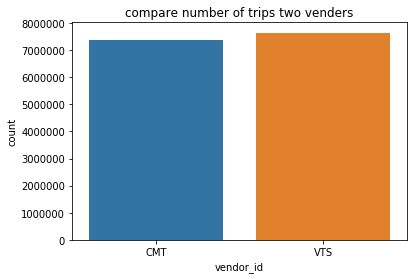

In [7]:
sns.countplot(x="vendor_id", data=df).set_title('compare number of trips two venders')

### Distribution of the number of passengers across the vendor_id variables CMT and CTS

Text(0.5,1,'count number of passengers CMT')

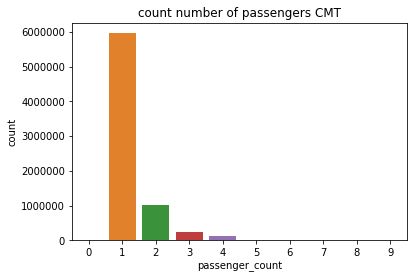

In [8]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == "CMT"]).set_title('count number of passengers CMT')


Text(0.5,1,'count number of passengers VTS')

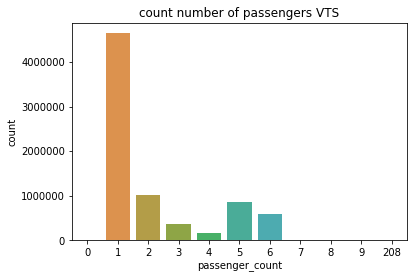

In [10]:
sns.countplot(x="passenger_count", data=df[df["vendor_id"] == "VTS"]).set_title('count number of passengers VTS')

###  Exploring the number of trips at each timestamp feature in the train dataset

In [12]:
#String to Datetime conversion
df["pickup_datetime"]= pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]= pd.to_datetime(df["dropoff_datetime"])

In [6]:
print("dataset start date: ", df["pickup_datetime"].min())
print("dataset end date: ", df["pickup_datetime"].max())

dataset start date:  2014-01-01 00:00:00
dataset end date:  2014-02-28 23:59:00


In [13]:
df["pickup_dayofweek"] = df.pickup_datetime.dt.dayofweek
df["pickup_weekday_name"] = df.pickup_datetime.dt.weekday_name
df["pickup_hour"] = df.pickup_datetime.dt.hour
df["pickup_month"] = df.pickup_datetime.dt.month

In [16]:
df.head(5)

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0       CMT 2014-01-09 20:45:25 2014-01-09 20:52:31                1   
1       CMT 2014-01-09 20:46:12 2014-01-09 20:55:12                1   
2       CMT 2014-01-09 20:44:47 2014-01-09 20:59:46                2   
3       CMT 2014-01-09 20:44:57 2014-01-09 20:51:40                1   
4       CMT 2014-01-09 20:47:09 2014-01-09 20:53:32                1   

   trip_distance  pickup_longitude  pickup_latitude  rate_code  \
0            0.7        -73.994770        40.736828          1   
1            1.4        -73.982392        40.773382          1   
2            2.3        -73.988570        40.739406          1   
3            1.7        -73.960213        40.770464          1   
4            0.9        -73.995371        40.717248          1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude payment_type  \
0                  N         -73.982227         40.731790          CRD   
1                  N         -73.960449         40.763995          CRD   
2                  N         -73.986626         40.765217          CRD   
3                  N         -73.979863         40.777050          CRD   
4                  N         -73.984367         40.720524          CRD   

   fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount  
0          6.5        0.5      0.5        1.40           0.0          8.90  
1          8.5        0.5      0.5        1.90           0.0         11.40  
2         11.5        0.5      0.5        1.50           0.0         14.00  
3          7.5        0.5      0.5        1.70           0.0         10.20  
4          6.0        0.5      0.5        1.75           0.0          8.75

### Distribution of trips across - months in the two month rage, day of the week and hour in a day.

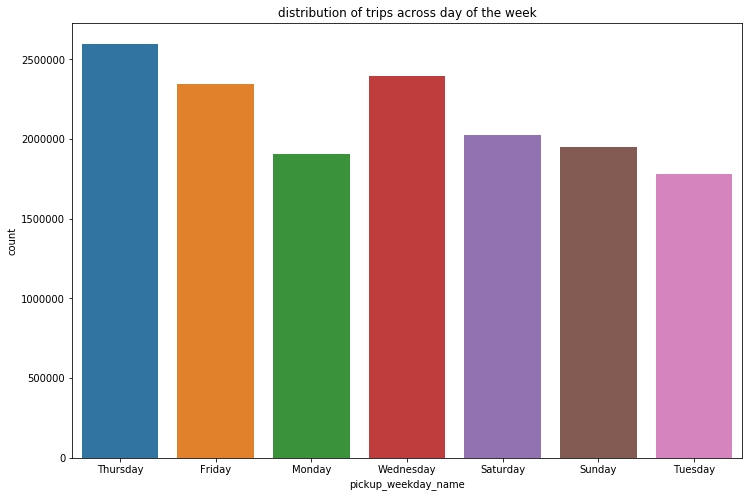

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df)
plt.title("distribution of trips across day of the week")
plt.show()

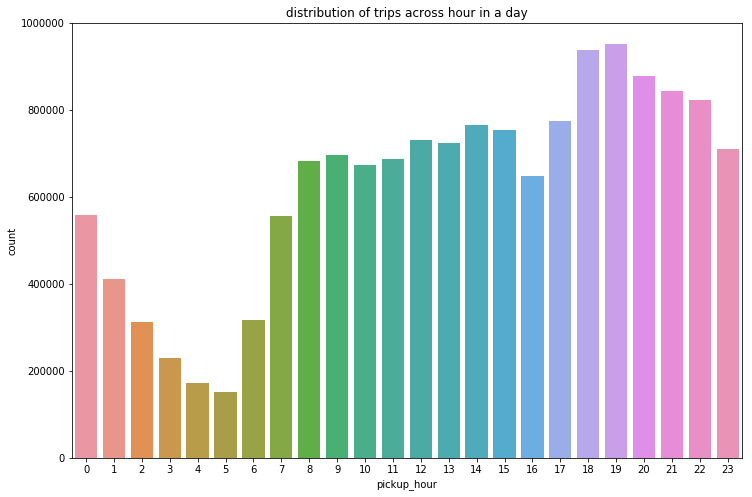

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_hour", data=df)
plt.title("distribution of trips across hour in a day")
plt.show()

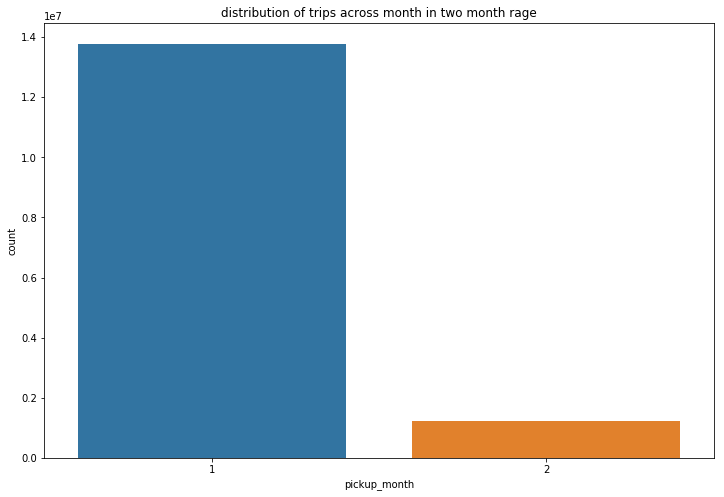

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_month", data=df)
plt.title("distribution of trips across month in two month rage")
plt.show()

### Distribution of the trip_duration across the dataset

In [17]:
# trip_duration is time between pickup time and dropoff time
df["trip_duration"] = df.dropoff_datetime -  df.pickup_datetime
df["trip_duration"] = df["trip_duration"].dt.total_seconds()
df.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0       CMT 2014-01-09 20:45:25 2014-01-09 20:52:31                1   
1       CMT 2014-01-09 20:46:12 2014-01-09 20:55:12                1   
2       CMT 2014-01-09 20:44:47 2014-01-09 20:59:46                2   
3       CMT 2014-01-09 20:44:57 2014-01-09 20:51:40                1   
4       CMT 2014-01-09 20:47:09 2014-01-09 20:53:32                1   

   trip_distance  pickup_longitude  pickup_latitude  rate_code  \
0            0.7        -73.994770        40.736828          1   
1            1.4        -73.982392        40.773382          1   
2            2.3        -73.988570        40.739406          1   
3            1.7        -73.960213        40.770464          1   
4            0.9        -73.995371        40.717248          1   

  store_and_fwd_flag  dropoff_longitude  ...  surcharge mta_tax  tip_amount  \
0                  N         -73.982227  ...        0.5     0.5        1.40   
1                  N         -73.960449  ...        0.5     0.5        1.90   
2                  N         -73.986626  ...        0.5     0.5        1.50   
3                  N         -73.979863  ...        0.5     0.5        1.70   
4                  N         -73.984367  ...        0.5     0.5        1.75   

   tolls_amount  total_amount  pickup_dayofweek  pickup_weekday_name  \
0           0.0          8.90                 3             Thursday   
1           0.0         11.40                 3             Thursday   
2           0.0         14.00                 3             Thursday   
3           0.0         10.20                 3             Thursday   
4           0.0          8.75                 3             Thursday   

   pickup_hour  pickup_month trip_duration  
0           20             1         426.0  
1           20             1         540.0  
2           20             1         899.0  
3           20             1         403.0  
4           20             1         383.0  

[5 rows x 23 columns]

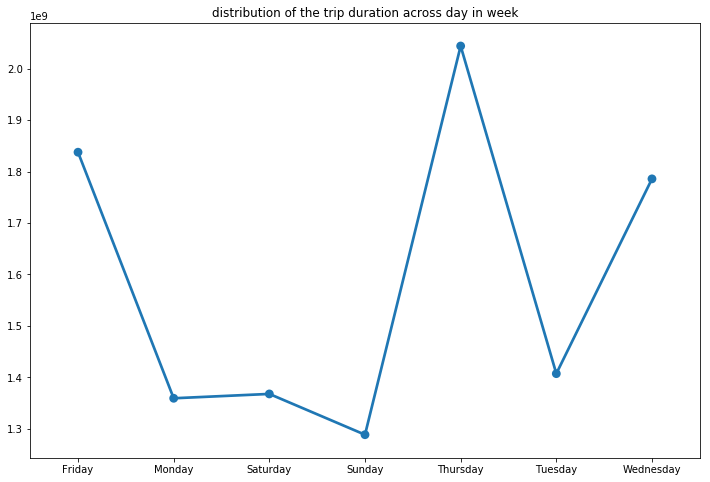

In [18]:
df_agg = df.groupby('pickup_weekday_name')['trip_duration'].aggregate(np.sum).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(df_agg.pickup_weekday_name.values, df_agg.trip_duration.values)
plt.title("distribution of the trip duration across day in week")
plt.show()

### distribution of trip distance, number of trips and total amount follow days

In [20]:
data_group_by_date = df.groupby([df['pickup_datetime'].dt.date]).agg({
    'trip_distance': 'sum', 
    'pickup_datetime': 'count', 
    'total_amount': 'sum'
}).rename(
    columns={
        'pickup_datetime':'count_trip',
        'trip_distance':'total_trip_distance',
    })
data_group_by_date.head(5)

total_trip_distance  count_trip  total_amount
pickup_datetime                                               
2014-01-01                1389465.30      420810  6.311396e+06
2014-01-02                1013221.70      359958  5.026119e+06
2014-01-03                 780968.47      275470  3.948563e+06
2014-01-04                1154593.11      417499  5.758762e+06
2014-01-05                1184631.99      388542  5.616510e+06

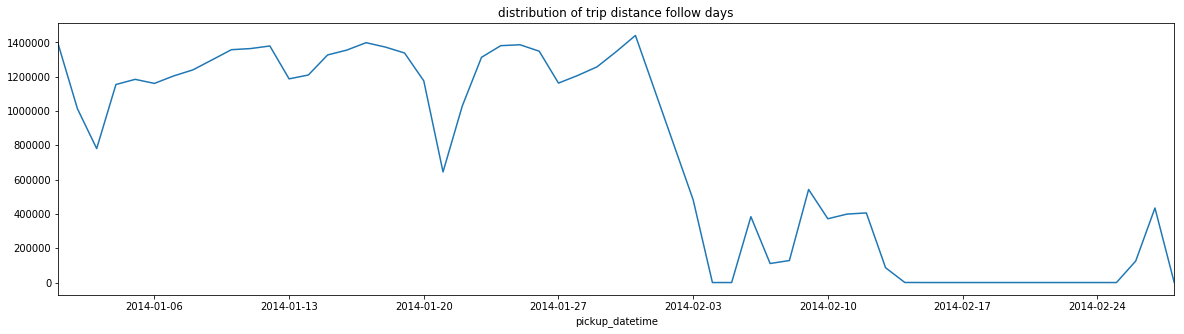

In [22]:
plt.title('distribution of trip distance follow days')
data_group_by_date['total_trip_distance'].plot(figsize=(20,5))

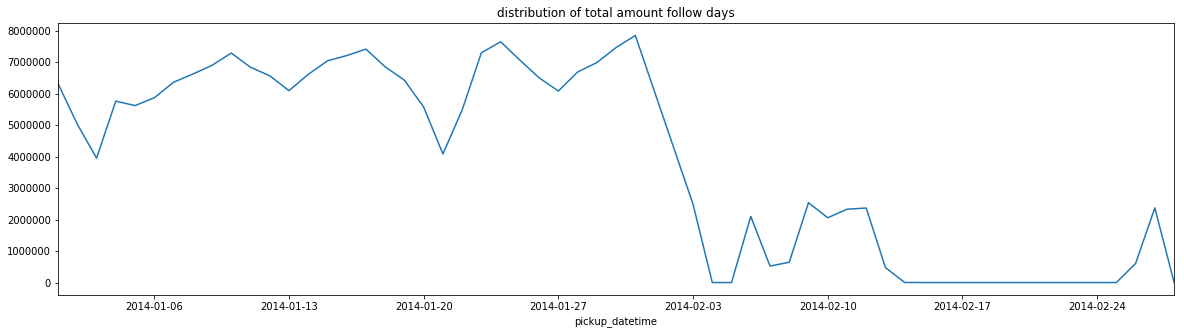

In [23]:
plt.title('distribution of total amount follow days')
data_group_by_date['total_amount'].plot(figsize=(20,5))

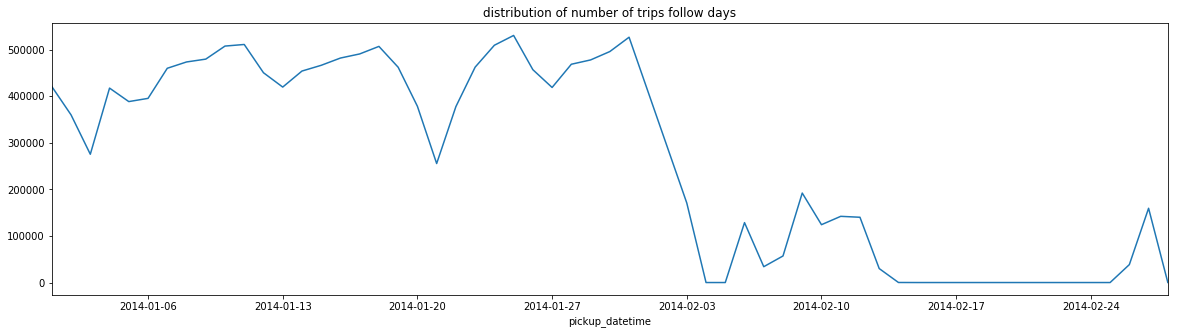

In [24]:
plt.title('distribution of number of trips follow days')
data_group_by_date['count_trip'].plot(figsize=(20,5))

# 6. Explore trips at location

In [28]:
import geopandas as gpd
from shapely.geometry import Point

In [33]:
# download shape file for NYC at this link : https://data.cityofnewyork.us/api/geospatial/kdig-pewd?method=export&format=Shapefile

In [29]:
map = gpd.read_file('shapefiles/geo_export_e5c57547-5a48-41ca-9d7f-eb3f46fdfaa7.shp')
type(map)

geopandas.geodataframe.GeoDataFrame

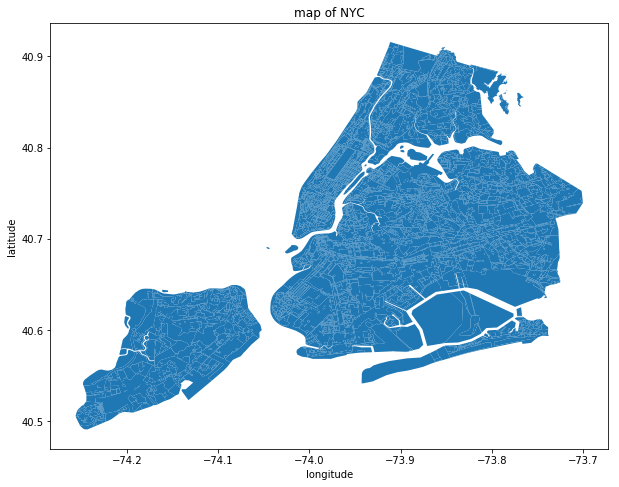

In [35]:
fig,ax = plt.subplots(figsize = [10,10])
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.title("map of NYC")
map.plot(ax = ax)

In [31]:
trip_groupby_location_pickup= df.groupby(['pickup_longitude','pickup_latitude'])['passenger_count'].aggregate(np.sum).reset_index()
trip_groupby_location_pickup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13918529 entries, 0 to 13918528
Data columns (total 3 columns):
pickup_longitude    float64
pickup_latitude     float64
passenger_count     int64
dtypes: float64(2), int64(1)
memory usage: 318.6 MB


### Because some of location are not in NYC, we need to filter them

In [32]:
filter_longitude1 = trip_groupby_location_pickup['pickup_longitude'] > -74.2
filter_longitude2 = trip_groupby_location_pickup['pickup_longitude'] < -73.7
filter_latitude1 = trip_groupby_location_pickup['pickup_latitude'] > 40.5
filter_latitude2 = trip_groupby_location_pickup['pickup_latitude'] < 40.9
df_temp = trip_groupby_location_pickup.where(filter_longitude1 & filter_longitude2 & filter_latitude1 & filter_latitude2)
df_dropna = df_temp.dropna()

In [33]:
geometry = [Point(xy) for xy in zip(df_dropna["pickup_longitude"], df_dropna["pickup_latitude"])]

In [29]:
geometry[:3]

### Create our GeoDataFrame

In [36]:
crs = {"init": "epsg: 4326"}
geo_df = gpd.GeoDataFrame(df_dropna, crs = crs, geometry = geometry)
geo_df.head()

pickup_longitude  pickup_latitude  passenger_count  \
772        -74.199963        40.856492              1.0   
773        -74.199887        40.587361              1.0   
774        -74.199655        40.890333              1.0   
776        -74.198597        40.825450              1.0   
777        -74.198506        40.829186              1.0   

                                 geometry  
772  POINT (-74.19996299999998 40.856492)  
773          POINT (-74.199887 40.587361)  
774  POINT (-74.19965500000001 40.890333)  
776   POINT (-74.19859700000001 40.82545)  
777  POINT (-74.19850599999998 40.829186)

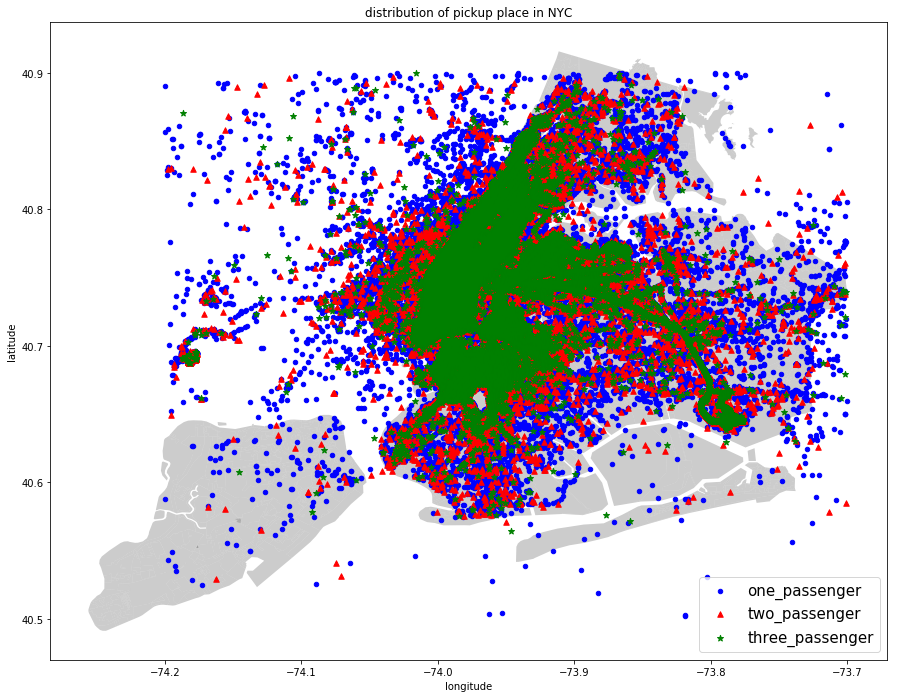

In [37]:
fig,ax = plt.subplots(figsize = [15,15])
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.title("distribution of pickup place in NYC")
map.plot(ax = ax, alpha = 0.4, color="grey")
geo_df[geo_df['passenger_count'] == 1].plot(ax = ax, markersize =20, color = "blue", marker = "o", label = "one_passenger" )
geo_df[geo_df['passenger_count'] == 2].plot(ax = ax, markersize =30, color = "red", marker = "^", label = "two_passenger" )
geo_df[geo_df['passenger_count'] == 3].plot(ax = ax, markersize =40, color = "green", marker = "*", label = "three_passenger" )
plt.legend(prop={'size': 15})